<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



# 017 Files and other Resources


## Introduction



### Purpose



### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [005 Getting help](005_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) In particular, you should be understand strings.
* [012 Groups](012_Python_groups.ipynb) In particular, lists.
* [013 Control](013_Python_control.ipynb) In particular, `if`.
* [014 String formatting](014_Python_strings_1.ipynb)
* [015 String methods](015_Python_string_methods.ipynb)


Remember that you can 'run' the code in a code block using the 'run' widget (above) or hitting the keys ('typing') <shift> and <return> at the same time. 

### Timing

The session should take around XX hours.

## Resource location

We store information on a computer in files, or file-like resources. We will use the term 'file' below to mean either of these concepts, other than specific issues relating to particular types of file/resource.

To get information from files, we need to be able to specify some **address** for the file/resource location, along with some way of interacting with the file. These concepts are captured in the idea of a [URI](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier) (Uniform Resource Indicator). You will most likely have come across the related idea of a [Uniform Resource Locator (URL)](https://en.wikipedia.org/wiki/URL), which is a URL such as [https://www.geog.ucl.ac.uk/people/academic-staff/philip-lewis](https://www.geog.ucl.ac.uk/people/academic-staff/philip-lewis)
that gives:

* the location of the resource: `people/academic-staff/philip-lewis`
* the access and interpretation protocol: [`https`](https://en.wikipedia.org/wiki/HTTPS) (secure [`http`](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol))
* the network domain name: [`www.geog.ucl.ac.uk`](https://www.geog.ucl.ac.uk)

When we visit this URL using an appropriate tool such as a browser, the tool can access and interpret the information in the resource: in this case, interpret the [html code](https://www.w3schools.com/html) in the file pointed to by the URL.

<html>
    <a href="017_Python_files.ipynb" target="_blank">017_Python_files.ipynb</a>
</html>

In [1]:
filename='017_Python_files.ipynb'
url = 'file://017_Python_files.ipynb'

We will use this idea to make a dictionary of our ENSO dataset, using the items in the header for the keys. In this way, we obtain a  more elegant representation of the dataset, and can refer to items by names (keys) instead of column numbers.

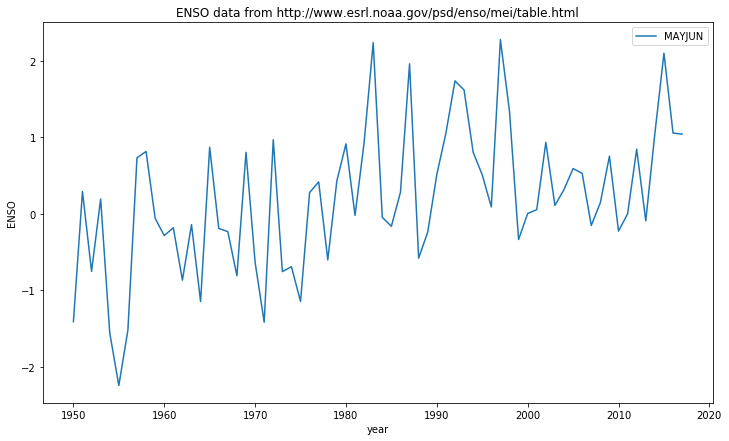

In [141]:
import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei.old/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

key = 'MAYJUN'
# plot data
plt.figure(0,figsize=(12,7))
plt.title('ENSO data from {0}'.format(url))
plt.plot(data_dict['YEAR'],data_dict[key],label=key)
plt.xlabel('year')
plt.ylabel('ENSO')
plt.legend(loc='best')

**Exercise 1.3.5**

* copy the code above, and modify so that datasets for months `['MAYJUN','JUNJUL','JULAUG']` are plotted on the graph

Hint: use a for loop

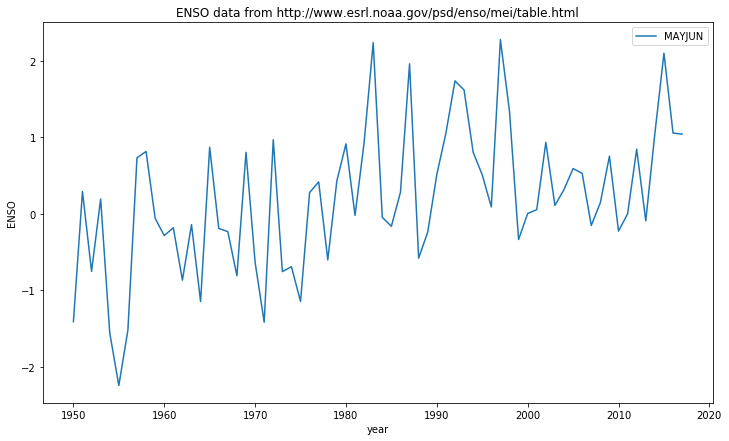

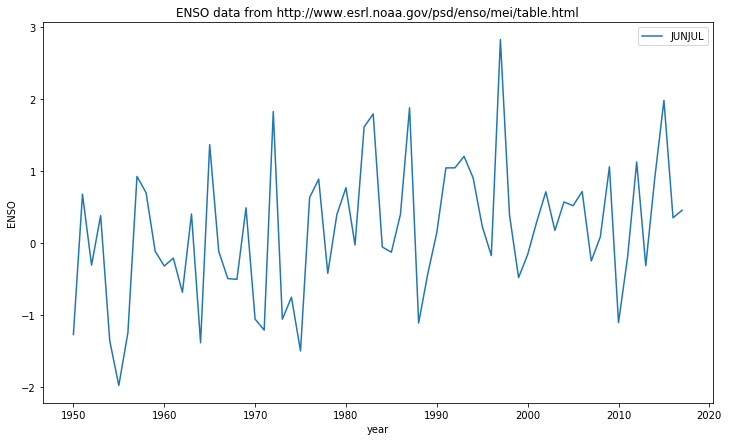

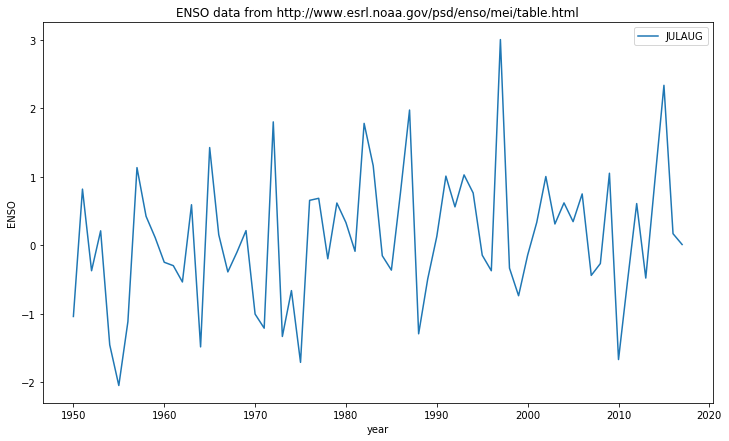

In [142]:
# do exercise here
# ANSWER

import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei.old/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))


'''
Do the loop here
'''
for i,key in enumerate(['MAYJUN','JUNJUL','JULAUG']):
    # plot data
    '''
    Use enumeration i as figure number
    '''
    plt.figure(i,figsize=(12,7))
    plt.title('ENSO data from {0}'.format(url))
    plt.plot(data_dict['YEAR'],data_dict[key],label=key)
    plt.xlabel('year')
    plt.ylabel('ENSO')
    plt.legend(loc='best')

We can also usefully use a dictionary with a printing format statement. In that case, we refer directly to the key in ther format string. This can make printing statements much easier to read. We don;'t directly pass the dictionary to the `fortmat` staterment, but rather `**dict`, where `**dict` means "treat the key-value pairs in the dictionary as additional named arguments to this function call".

So, in the example:

In [143]:
import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))
print(data_dict.keys())

# print the data for MAYJUN
print('data for MAYJUN: {MAYJUN}'.format(**data_dict))

dict_keys(['YEAR', 'DECJAN', 'JANFEB', 'FEBMAR', 'MARAPR', 'APRMAY', 'MAYJUN', 'JUNJUL', 'JULAUG', 'AUGSEP', 'SEPOCT', 'OCTNOV', 'NOVDEC'])
data for MAYJUN: [-1.412e+00  2.880e-01 -7.560e-01  1.910e-01 -1.558e+00 -2.247e+00
 -1.523e+00  7.300e-01  8.120e-01 -6.200e-02 -2.870e-01 -1.850e-01
 -8.700e-01 -1.440e-01 -1.150e+00  8.670e-01 -1.930e-01 -2.360e-01
 -8.120e-01  8.010e-01 -6.360e-01 -1.420e+00  9.660e-01 -7.580e-01
 -6.940e-01 -1.148e+00  2.760e-01  4.140e-01 -6.050e-01  4.290e-01
  9.110e-01 -2.400e-02  9.300e-01  2.235e+00 -4.900e-02 -1.660e-01
  2.790e-01  1.958e+00 -5.820e-01 -2.420e-01  5.110e-01  1.051e+00
  1.735e+00  1.616e+00  8.030e-01  5.070e-01  8.700e-02  2.275e+00
  1.336e+00 -3.390e-01  1.000e-03  5.200e-02  9.320e-01  1.070e-01
  3.150e-01  5.890e-01  5.260e-01 -1.550e-01  1.420e-01  7.510e-01
 -2.280e-01 -3.000e-03  8.420e-01 -9.400e-02  1.046e+00  2.097e+00
  1.053e+00  1.039e+00]


The line `print('data for MAYJUN: {MAYJUN}'.format(**data_dict))` is equivalent to writing:

    print('data for {MAYJUN}'.format(YEAR=data_dict[YEAR],DECJAN=data_dict[DECJAN], ...))
    
In this way, we use the keys in the dictionary as keywords to pass to a method.

Another useful example of such a use of a dictionary is in saving a numpy dataset to file.

If the data are numpy arrays in a dictionary as above, we can store the dataset using:



In [147]:
import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

filename = 'enso_mei.npz'

# save the dataset
np.savez_compressed(filename,**data_dict)

What we load from the file is a dictionary-like object `<class 'numpy.lib.npyio.NpzFile'>`.

If needed, we can cast this to a dictionary with `dict()`, but it is generally more efficient to keep the original type.

In [145]:
# load the dataset

filename = 'enso_mei.npz'

loaded_data = np.load(filename)

print(type(loaded_data))

# test they are the same using np.array_equal
for k in loaded_data.keys():
    print('\t',k,np.array_equal(data_dict[k], loaded_data[k]))

<class 'numpy.lib.npyio.NpzFile'>
	 YEAR True
	 DECJAN True
	 JANFEB True
	 FEBMAR True
	 MARAPR True
	 APRMAY True
	 MAYJUN True
	 JUNJUL True
	 JULAUG True
	 AUGSEP True
	 SEPOCT True
	 OCTNOV True
	 NOVDEC True


**Exercise 1.3.6**

* Using what you have learned above, access the Met Office data file [`https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt`](https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt) and create a 'data package' in a numpy`.npz` file that has keys of `YEAR` and each month in the year, with associated datasets of Monthly Southeast England precipitation (mm).
* confirm that tha data in your `npz` file is the same as in your original dictionary
* produce a plot of October rainfall using these data for the years 1900 onwards

In [157]:
# do exercise here
# ANSWER

'''
Exploration of dataset shows:


Monthly Southeast England precipitation (mm). Daily automated values used after 1996.
Wigley & Jones (J.Climatol.,1987), Gregory et al. (Int.J.Clim.,1991)
Jones & Conway (Int.J.Climatol.,1997), Alexander & Jones (ASL,2001). Values may change after QC.
YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC   ANN
 1873  87.1  50.4  52.9  19.9  41.1  63.6  53.2  56.4  62.0  86.0  59.4  15.7  647.7
 1874  46.8  44.9  15.8  48.4  24.1  49.9  28.3  43.6  79.4  96.1  63.9  52.3  593.5

so we have 3 lines of header
then the column titles
then the data

we can define these as before using

txt.find('YEAR')
start_data = txt.find('1873')
stop_data = None


Other than the filenames then, the code
is identical
'''

import requests
import numpy as np
import io

# access dataset as above
url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1873')
stop_data  = None

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

filename = 'HadSEEP_monthly_qc.npz'

# save the dataset
np.savez_compressed(filename,**data_dict)

In [158]:
# ANSWER

loaded_data = np.load(filename)

print(type(loaded_data))

# test they are the same using np.array_equal
for k in loaded_data.keys():
    print('\t',k,np.array_equal(data_dict[k], loaded_data[k]))

<class 'numpy.lib.npyio.NpzFile'>
	 YEAR True
	 JAN True
	 FEB True
	 MAR True
	 APR True
	 MAY True
	 JUN True
	 JUL True
	 AUG True
	 SEP True
	 OCT True
	 NOV True
	 DEC True
	 ANN True


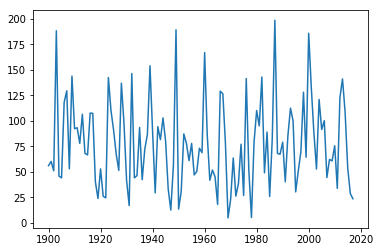

In [163]:
# ANSWER

'''
October rainfall, 1900+
'''

year = loaded_data['YEAR']

# mask where years match
mask = year  >= 1900

oct = loaded_data['OCT']

# set invalid data points to nan
oct[oct<0] = np.nan

plt.plot(year[mask],oct[mask])

### 1.3.5 Summary

In this section, we have extended the types of data we might come across to include groups . We dealt with ordered groups of various types (`tuple`, `list`), and introduced the numpy package for numpy arrays (`np.array`). We saw dictionaries as collections with which we refer to individual items with a key.

We learned in the previous section how to pull apart a dataset presented as a string using loops and various using methods and to construct a useful dataset 'by hand' in a list or similar structure. It is useful, when learning to program, to know how to do this.

Here, we saw that packages such as numpy provide higher level routines that make reading data easier, and we would generally use these in practice. We saw how we can use `zip()` to help load a dataset from arrays into a dictionary, and also the value of using a dictionary representation when saving numpy files.